In [9]:
# Import the necessary packages 
# USAGE
# When encoding on laptop, desktop, or GPU (slower, more accurate):
# python encode_faces.py --dataset dataset --encodings encodings.pickle --detection-method cnn
# When encoding on Raspberry Pi (faster, more accurate):
# python encode_faces.py --dataset dataset --encodings encodings.pickle --detection-method hog

# import the necessary packages
from imutils import paths
import face_recognition
import pickle
import cv2
import os
import imutils
import time
from IPython.display import clear_output
import PIL.Image
from io import BytesIO
import IPython.display

In [10]:
# Function to display image
def array_to_image(a, fmt='jpeg'):
    #Create binary stream object
    f = BytesIO()
    #Convert array to binary stream object
    PIL.Image.fromarray(a).save(f, fmt)
    return IPython.display.Image(data=f.getvalue())

In [11]:
def get_frame(cam):
    # Capture frame-by-frame
    ret, frame = cam.read()
    #flip image for natural viewing
    #frame = cv2.flip(frame, 1)
    return frame

In [12]:
# Get the camera ready
cam = cv2.VideoCapture(0)

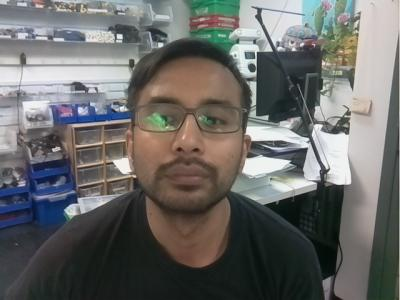

In [13]:
# The live feed will be displayed in this cell
d = IPython.display.display("", display_id=1)
#d2 = IPython.display.display("", display_id=2)

In [14]:
# Replace this with your name 
name="dipesh"
# Create a folder with the name if it does not exist
try:
    directoryName="/home/pi/Desktop/me34Notebook/opencv/faceDetection/dataset/"+name
    os.mkdir(directoryName)
    print(directoryName+ " Created")
except:
    print("Directory already exists")

Directory already exists


In [18]:
# Get ready to take pictures 
count=0
for i in range(5):
    count+=1
    print("Smile")
    frame = get_frame(cam)
    print("3")
    time.sleep(0.5)
    print("2")
    time.sleep(0.5)
    print("1")
    time.sleep(0.5)
    frame = imutils.resize(frame, width=400, inter=cv2.INTER_LINEAR)
    frameDisplay = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image = array_to_image(frameDisplay)
    d.update(image)

    filename=directoryName+"/"+name+str(count)+".jpg"
    cv2.imwrite(filename,frame)
    print("Saved. Get ready for next")
    time.sleep(2)
    #Read image from disk (reads as array)
    image=cv2.imread(filename)
    #Note: Scroll up to see the updated image in Ipython.display section

Smile
3
2
1
Saved. Get ready for next
Smile
3
2
1
Saved. Get ready for next
Smile
3
2
1
Saved. Get ready for next
Smile
3
2
1
Saved. Get ready for next
Smile
3
2
1
Saved. Get ready for next


In [19]:
# Release the camera resources
cam.release()
IPython.display.clear_output()
print ("Stream stopped")
cv2.destroyAllWindows()

Stream stopped


In [20]:
# Grab the paths to the input images in our dataset
# Save your pictures in the dataset folder 
imagePaths = list(paths.list_images("/home/pi/Desktop/PythonBasics/OpenCV/pi-face-recognition/dataset"))

In [21]:
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

In [22]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]

	# load the input image and convert it from RGB (OpenCV ordering)
	# to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
	boxes = face_recognition.face_locations(rgb,
		model="hog")

	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)

	# loop over the encodings
	for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
		knownEncodings.append(encoding)
		knownNames.append(name)

# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open("encodings.pickle", "wb")
f.write(pickle.dumps(data))
f.close()
print("Complete")

[INFO] processing image 1/14
[INFO] processing image 2/14
[INFO] processing image 3/14
[INFO] processing image 4/14
[INFO] processing image 5/14
[INFO] processing image 6/14
[INFO] processing image 7/14
[INFO] processing image 8/14
[INFO] processing image 9/14
[INFO] processing image 10/14
[INFO] processing image 11/14
[INFO] processing image 12/14
[INFO] processing image 13/14
[INFO] processing image 14/14
[INFO] serializing encodings...
Complete


### Use faceRecognitionAndStreaming.ipynb to test if the camera recognizes you